In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
import doctest
import copy

In [2]:
Image('wheel_encoders.png')

In a differential-drive model, we discussed the relation between wheel velocities and robot's rotational and translational velocity, i.e, $v, \omega$. 

If we need to know curent $v, \omega$ how to measure wheel velocities? We use wheel encoders

Encoder resolution = $N$

Every $\Delta T$ ms,
+ Encoder reports # ticks wheel moved = $n$
+ Angle moved = $2\pi \frac{n}{N}$

Usage
+ Smallest movement that can be measured is $\frac{2\pi}{N}$
+ Largest speed that can be measured is $\frac{2\pi}{\Delta T}$

Pros:
+ Fairly accurate estimates of linear/ angular velocity
+ Distances and rotations are accurate in short-term

Cons:
+ Vehicle position “drifts” when $v,\omega$ is integrated over longer periods

Say, your robot's initial pose is (0.0, 0.0, 0.0), write a program to accept left and right ticks as input and output the next pose

Assume an unicycle model and following vehicle parameters
+ Wheel radius ($r$) =  2.0m
+ Track-width ($L$) = 4.0m
+ Encoder ticks ($N$) = 100 
+ Encoder frequency ($\Delta T$) = 0.1

Test your code with $n_{right} = 10$ and $N_{left} = 6$. Do you get the next pose as $(1.0053, 0.0, 0.1257)$?

### Effect of angular error in pose estimate

In [3]:
initial_error = np.deg2rad(1.0)
robot_pose = np.array([0, 0, np.pi/2 + initial_error])

In [4]:
#https://stackoverflow.com/questions/40137950/possible-to-run-python-doctest-on-a-jupyter-cell-function
def test(func):
    '''
    Use test as a decorator to a function with doctests in Jupyter notebook. 
    Run the cell to see the results of the doctests.
    '''
    globs = copy.copy(globals())
    globs.update({func.__name__:func})
    doctest.run_docstring_examples(func, globs, verbose=True, name=func.__name__)
    return func

In [5]:
@test 
def unicycle_model(curr_pose, v, w, dt=1.0):
    '''
    >>> unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
    (1.0, 0.0, 0.0)
    >>> unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
    (0.0, 0.0, 1.0)
    >>> unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
    (1.0, 0.0, 1.0)
    '''
    ## write code to calculate next_pose
    # refer to the kinematic equations of a unicycle model
    x, y, theta = curr_pose
    x += v*np.cos(theta)*dt
    y += v*np.sin(theta)*dt
    theta += w*dt
    
    # Keep theta bounded between [-pi, pi]
    theta = np.arctan2(np.sin(theta), np.cos(theta))

    # return calculated (x, y, theta)
    return x, y, theta


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.7/doctest.py", line 1487, in run
    sys.settrace(save_trace)



Finding tests in unicycle_model
Trying:
    unicycle_model((0.0,0.0,0.0), 1.0, 0.0)
Expecting:
    (1.0, 0.0, 0.0)
ok
Trying:
    unicycle_model((0.0,0.0,0.0), 0.0, 1.0)
Expecting:
    (0.0, 0.0, 1.0)
ok
Trying:
    unicycle_model((0.0, 0.0, 0.0), 1.0, 1.0)
Expecting:
    (1.0, 0.0, 1.0)
ok


In [6]:
#straight line
straight_trajectory = []
pose = (0, 0, np.pi/2)
steps = 10
#fill in v and omega values
all_v = np.ones(steps)
all_w = np.zeros(steps)
for v, w in zip(all_v, all_w):
   # store pose
   straight_trajectory.append(pose)
   #instruction to take v, w and compute new pose    
   pose = unicycle_model(pose, v, w)
straight_trajectory = np.array(straight_trajectory)

print(60 * np.tan(np.deg2rad(2)))

2.095246169504864


If there was no initial angle error, robot will end up at $x$ = 0.0. 

Plot a graph between initial_error and final $x$ position?

### Demonstrate localization drift in wheel encoders

### Synthetic dataset

In [7]:
all_v = np.ones(100)
all_w = np.zeros(100) 

In [32]:
wheel_enc_traj, wheel_enc_traj_noisy = [], []
ideal_pose = np.array([0, 0, np.pi/2])

robot_traj = []
for v, w in zip(all_v, all_w):
    robot_traj.append(ideal_pose)
    
    #code to update ideal_pose
    ideal_pose = unicycle_model(pose,v,w)
    
    #code to update noisy pose
    #add gaussian noise with std dev of 0.01 to omega
    
    
robot_traj = np.array(robot_traj)


    


In [40]:
noisy_pose = np.array([0, 0, np.pi/2])
robot_traj_noisy= []
for v, w in zip(all_v, all_w):
   robot_traj_noisy.append(noisy_pose)
   noisy_w=[0]*len(all_w)
   for i in range(len(all_w)):
   noisy_w[i] = all_w[i]+np.random.normal(0,0.01,len(all_w)[i])  
   
  
    noisy_pose = unicycle_model(pose,v,noisy_w)

 robot_traj_noisy = np.array(robot_traj_noisy)

IndentationError: ignored

In [ ]:
plt.figure()
plt.grid()
plt.axes().set_aspect("equal","datalim")
plt.plot(robot_traj[:,0], robot_traj[:,1],'k-')
plt.plot(robot_traj_noisy[:,0], robot_traj_noisy[:,1],'b-')
plt.plot(0, 0, 'r+', ms=10)
plt.legend()

### Real dataset

In [ ]:

ground_truth = pd.read_csv("https://raw.githubusercontent.com/Puneet-d3f4u1t/Test-1/main/ground_truth.csv")
gt_traj = np.array(ground_truth[['x','y']])
wheel_enc = np.array(pd.read_csv("https://raw.githubusercontent.com/Puneet-d3f4u1t/Test-1/main/wheel_control.csv")[['v','w']])

In [ ]:
pose = np.array(ground_truth[['x','y','theta']])[0] #initial pose
robot_traj = []
for v, w in wheel_enc:
    robot_traj.append(pose)
    # code for updating pose
    pose= unicycle_model(pose,v,w,0.01)
robot_traj = np.array(robot_traj)

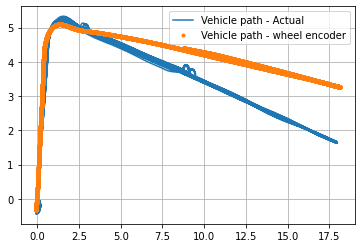

In [ ]:
end = 10000
plt.figure()
plt.grid()
plt.plot(gt_traj[:,0], gt_traj[:,1], label='Vehicle path - Actual')
plt.plot(robot_traj[:end,0], robot_traj[:end,1], '.', label='Vehicle path - wheel encoder')
plt.legend()